In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('input/fraudTrain.csv')
test = pd.read_csv('input/fraudTest.csv')
test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

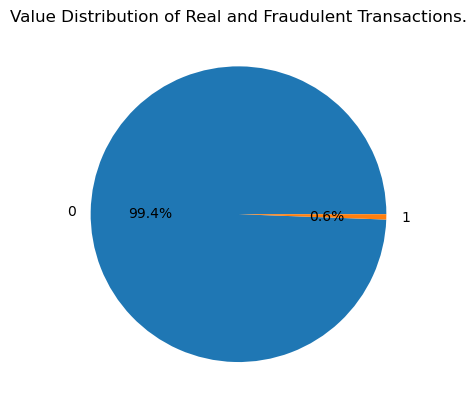

<Figure size 1000x600 with 0 Axes>

In [5]:
data = train['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution of Real and Fraudulent Transactions.")
plt.figure(figsize=(10, 6))
plt.show()

In [3]:
train.drop(['Unnamed: 0','cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
test.drop(['Unnamed: 0','cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [4]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [5]:
#Calculate Age
train["age"] = train["trans_date"]-train["dob"]
train["age"]=train["age"].astype('timedelta64[Y]')

test["age"] = test["trans_date"]-test["dob"]
test["age"]=test["age"].astype('timedelta64[Y]')
 

In [6]:
# Get Transaction Month & Year
train['trans_month'] = pd.DatetimeIndex(train['trans_date']).month
train['trans_year'] = pd.DatetimeIndex(train['trans_date']).year
test['trans_month'] = pd.DatetimeIndex(test['trans_date']).month
test['trans_year'] = pd.DatetimeIndex(test['trans_date']).year
train

trans_date_trans_time       category     amt gender  \
0         2019-01-01 00:00:18       misc_net    4.97      F   
1         2019-01-01 00:00:44    grocery_pos  107.23      F   
2         2019-01-01 00:00:51  entertainment  220.11      M   
3         2019-01-01 00:01:16  gas_transport   45.00      M   
4         2019-01-01 00:03:06       misc_pos   41.96      M   
...                       ...            ...     ...    ...   
1296670   2020-06-21 12:12:08  entertainment   15.56      M   
1296671   2020-06-21 12:12:19    food_dining   51.70      M   
1296672   2020-06-21 12:12:32    food_dining  105.93      M   
1296673   2020-06-21 12:13:36    food_dining   74.90      M   
1296674   2020-06-21 12:13:37    food_dining    4.30      M   

                             city state      lat      long  city_pop  \
0                  Moravian Falls    NC  36.0788  -81.1781      3495   
1                          Orient    WA  48.8878 -118.2105       149   
2                      Malad City    ID  42.1808 -112.2620      4154   
3                         Boulder    MT  46.2306 -112.1138      1939   
4                        Doe Hill    VA  38.4207  -79.4629        99   
...                           ...   ...      ...       ...       ...   
1296670                     Hatch    UT  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
1296673                 Manderson    SD  43.3526 -102.5411      1126   
1296674                      Sula    MT  45.8433 -113.8748       218   

                                       job        dob  merch_lat  merch_long  \
0                Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1        Special educational needs teacher 1978-06-21  49.159047 -118.186462   
2              Nature conservation officer 1962-01-19  43.150704 -112.154481   
3                          Patent attorney 1967-01-12  47.034331 -112.561071   
4           Dance movement psychotherapist 1986-03-28  38.674999  -78.632459   
...                                    ...        ...        ...         ...   
1296670                       Geoscientist 1961-11-24  36.841266 -111.690765   
1296671   Production assistant, television 1979-12-11  38.906881  -78.246528   
1296672                    Naval architect 1967-08-30  33.619513 -105.130529   
1296673              Volunteer coordinator 1980-08-18  42.788940 -103.241160   
1296674           Therapist, horticultural 1995-08-16  46.565983 -114.186110   

         is_fraud trans_date   age  trans_month  trans_year  
0               0 2019-01-01  30.0            1        2019  
1               0 2019-01-01  40.0            1        2019  
2               0 2019-01-01  56.0            1        2019  
3               0 2019-01-01  51.0            1        2019  
4               0 2019-01-01  32.0            1        2019  
...           ...        ...   ...          ...         ...  
1296670         0 2020-06-21  58.0            6        2020  
1296671         0 2020-06-21  40.0            6        2020  
1296672         0 2020-06-21  52.0            6        2020  
1296673         0 2020-06-21  39.0            6        2020  
1296674         0 2020-06-21  24.0            6        2020  

[1296675 rows x 18 columns]

In [7]:
#Calculate distance between merchant and home location
train['latitudinal_distance'] = abs(round(train['merch_lat']-train['lat'],3))
train['longitudinal_distance'] = abs(round(train['merch_long']-train['long'],3))

test['latitudinal_distance'] = abs(round(test['merch_lat']-test['lat'],3))
test['longitudinal_distance'] = abs(round(test['merch_long']-test['long'],3))
train
                           

trans_date_trans_time       category     amt gender  \
0         2019-01-01 00:00:18       misc_net    4.97      F   
1         2019-01-01 00:00:44    grocery_pos  107.23      F   
2         2019-01-01 00:00:51  entertainment  220.11      M   
3         2019-01-01 00:01:16  gas_transport   45.00      M   
4         2019-01-01 00:03:06       misc_pos   41.96      M   
...                       ...            ...     ...    ...   
1296670   2020-06-21 12:12:08  entertainment   15.56      M   
1296671   2020-06-21 12:12:19    food_dining   51.70      M   
1296672   2020-06-21 12:12:32    food_dining  105.93      M   
1296673   2020-06-21 12:13:36    food_dining   74.90      M   
1296674   2020-06-21 12:13:37    food_dining    4.30      M   

                             city state      lat      long  city_pop  \
0                  Moravian Falls    NC  36.0788  -81.1781      3495   
1                          Orient    WA  48.8878 -118.2105       149   
2                      Malad City    ID  42.1808 -112.2620      4154   
3                         Boulder    MT  46.2306 -112.1138      1939   
4                        Doe Hill    VA  38.4207  -79.4629        99   
...                           ...   ...      ...       ...       ...   
1296670                     Hatch    UT  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
1296673                 Manderson    SD  43.3526 -102.5411      1126   
1296674                      Sula    MT  45.8433 -113.8748       218   

                                       job        dob  merch_lat  merch_long  \
0                Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1        Special educational needs teacher 1978-06-21  49.159047 -118.186462   
2              Nature conservation officer 1962-01-19  43.150704 -112.154481   
3                          Patent attorney 1967-01-12  47.034331 -112.561071   
4           Dance movement psychotherapist 1986-03-28  38.674999  -78.632459   
...                                    ...        ...        ...         ...   
1296670                       Geoscientist 1961-11-24  36.841266 -111.690765   
1296671   Production assistant, television 1979-12-11  38.906881  -78.246528   
1296672                    Naval architect 1967-08-30  33.619513 -105.130529   
1296673              Volunteer coordinator 1980-08-18  42.788940 -103.241160   
1296674           Therapist, horticultural 1995-08-16  46.565983 -114.186110   

         is_fraud trans_date   age  trans_month  trans_year  \
0               0 2019-01-01  30.0            1        2019   
1               0 2019-01-01  40.0            1        2019   
2               0 2019-01-01  56.0            1        2019   
3               0 2019-01-01  51.0            1        2019   
4               0 2019-01-01  32.0            1        2019   
...           ...        ...   ...          ...         ...   
1296670         0 2020-06-21  58.0            6        2020   
1296671         0 2020-06-21  40.0            6        2020   
1296672         0 2020-06-21  52.0            6        2020   
1296673         0 2020-06-21  39.0            6        2020   
1296674         0 2020-06-21  24.0            6        2020   

         latitudinal_distance  longitudinal_distance  
0                       0.068                  0.870  
1                       0.271                  0.024  
2                       0.970                  0.108  
3                       0.804                  0.447  
4                       0.254                  0.830  
...                       ...                    ...  
1296670                 0.876                  0.787  
1296671                 0.360                  0.736  
1296672                 0.680                  0.688  
1296673                 0.564                  0.700  
1296674                 0.723                  0.311  

[129667

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# Calculate distance
train['distance'] = train.apply(lambda row: haversine(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)
train

trans_date_trans_time       category     amt gender  \
0         2019-01-01 00:00:18       misc_net    4.97      F   
1         2019-01-01 00:00:44    grocery_pos  107.23      F   
2         2019-01-01 00:00:51  entertainment  220.11      M   
3         2019-01-01 00:01:16  gas_transport   45.00      M   
4         2019-01-01 00:03:06       misc_pos   41.96      M   
...                       ...            ...     ...    ...   
1296670   2020-06-21 12:12:08  entertainment   15.56      M   
1296671   2020-06-21 12:12:19    food_dining   51.70      M   
1296672   2020-06-21 12:12:32    food_dining  105.93      M   
1296673   2020-06-21 12:13:36    food_dining   74.90      M   
1296674   2020-06-21 12:13:37    food_dining    4.30      M   

                             city state      lat      long  city_pop  \
0                  Moravian Falls    NC  36.0788  -81.1781      3495   
1                          Orient    WA  48.8878 -118.2105       149   
2                      Malad City    ID  42.1808 -112.2620      4154   
3                         Boulder    MT  46.2306 -112.1138      1939   
4                        Doe Hill    VA  38.4207  -79.4629        99   
...                           ...   ...      ...       ...       ...   
1296670                     Hatch    UT  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
1296673                 Manderson    SD  43.3526 -102.5411      1126   
1296674                      Sula    MT  45.8433 -113.8748       218   

                                       job  ...  merch_lat  merch_long  \
0                Psychologist, counselling  ...  36.011293  -82.048315   
1        Special educational needs teacher  ...  49.159047 -118.186462   
2              Nature conservation officer  ...  43.150704 -112.154481   
3                          Patent attorney  ...  47.034331 -112.561071   
4           Dance movement psychotherapist  ...  38.674999  -78.632459   
...                                    ...  ...        ...         ...   
1296670                       Geoscientist  ...  36.841266 -111.690765   
1296671   Production assistant, television  ...  38.906881  -78.246528   
1296672                    Naval architect  ...  33.619513 -105.130529   
1296673              Volunteer coordinator  ...  42.788940 -103.241160   
1296674           Therapist, horticultural  ...  46.565983 -114.186110   

         is_fraud  trans_date   age  trans_month  trans_year  \
0               0  2019-01-01  30.0            1        2019   
1               0  2019-01-01  40.0            1        2019   
2               0  2019-01-01  56.0            1        2019   
3               0  2019-01-01  51.0            1        2019   
4               0  2019-01-01  32.0            1        2019   
...           ...         ...   ...          ...         ...   
1296670         0  2020-06-21  58.0            6        2020   
1296671         0  2020-06-21  40.0            6        2020   
1296672         0  2020-06-21  52.0            6        2020   
1296673         0  2020-06-21  39.0            6        2020   
1296674         0  2020-06-21  24.0            6        2020   

         latitudinal_distance  longitudinal_distance    distance  
0                       0.068                  0.870   78.597568  
1                       0.271                  0.024   30.212176  
2                       0.970                  0.108  108.206083  
3                       0.804                  0.447   95.673231  
4                       0.254                  0.830   77.556744  
...                       ...                    ...         ...  
1296670                 0.876                  0.787  119.752136  
1296671                 0.360                  0.736   75.104085  
1296672                 0.680                  0.688   99.047734  
1296673                 0.564                  0.700   84.

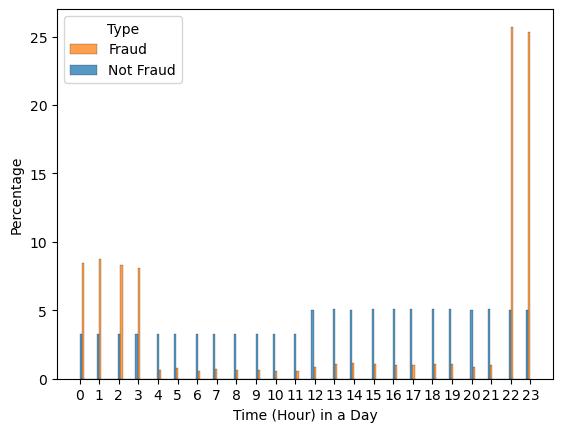

In [9]:
#time in a day vs fraud
train['hour']=pd.to_datetime(train['trans_date_trans_time']).dt.hour
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\2259173191.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


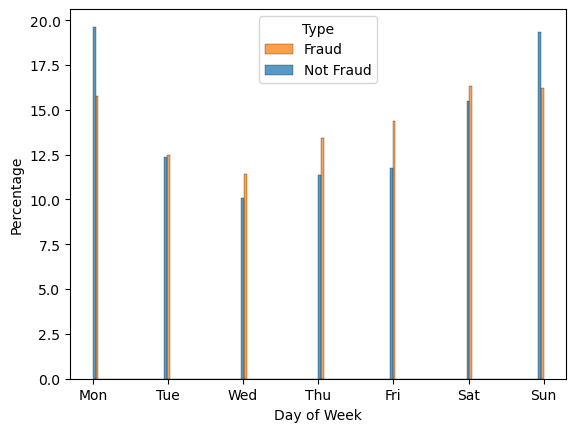

In [10]:
#day of week vs fraud
train['day']=pd.to_datetime(train['trans_date_trans_time']).dt.dayofweek
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=train, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

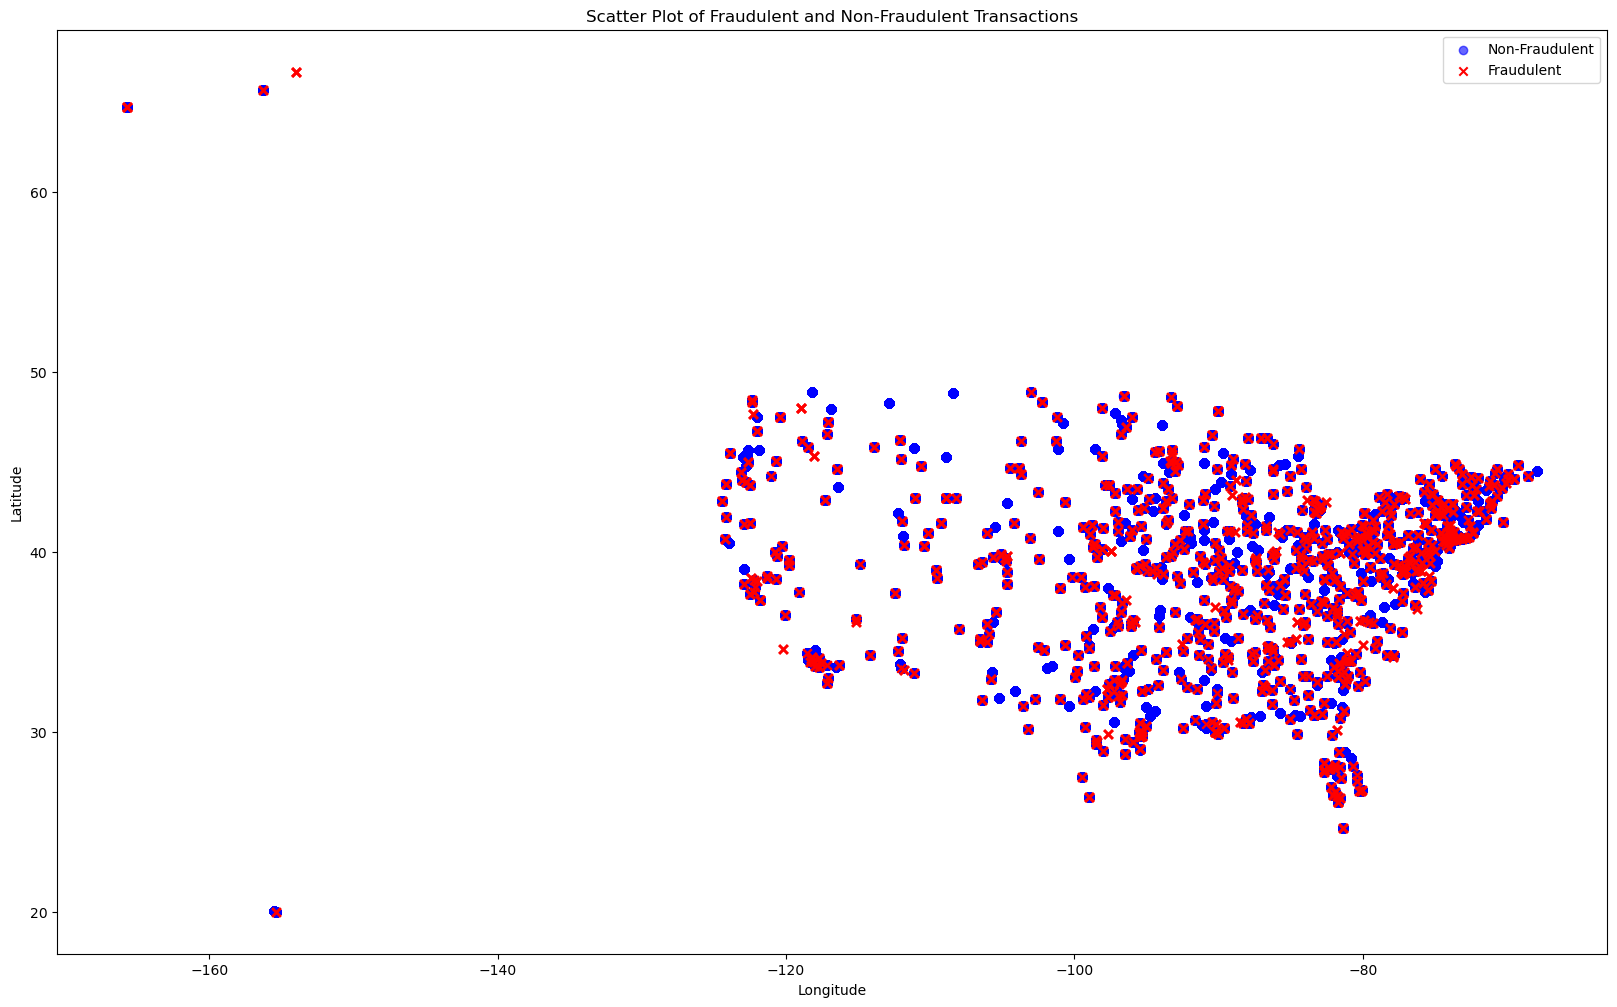

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train' is your DataFrame and has columns 'long', 'lat', and 'is_fraud'
x_values = train['long']
y_values = train['lat']
is_fraud = train['is_fraud']

# Add jitter to the coordinates
jitter = 0.0001
x_values_jittered = x_values + np.random.normal(0, jitter, size=x_values.shape)
y_values_jittered = y_values + np.random.normal(0, jitter, size=y_values.shape)

# Create a scatter plot with different colors for is_fraud
plt.figure(figsize=(20, 12))

# Plot non-fraudulent points
plt.scatter(x_values_jittered[is_fraud == 0], y_values_jittered[is_fraud == 0], marker='o', color='blue', label='Non-Fraudulent', alpha=0.6)

# Plot fraudulent points
plt.scatter(x_values_jittered[is_fraud == 1], y_values_jittered[is_fraud == 1], marker='x', color='red', label='Fraudulent', alpha=1.0)

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Fraudulent and Non-Fraudulent Transactions')
plt.show()


In [12]:
test['distance'] = test.apply(lambda row: haversine(row['merch_lat'], row['merch_long'], row['lat'], row['long']), axis=1)

test

trans_date_trans_time        category     amt gender          city  \
0        2020-06-21 12:14:25   personal_care    2.86      M      Columbia   
1        2020-06-21 12:14:33   personal_care   29.84      F       Altonah   
2        2020-06-21 12:14:53  health_fitness   41.28      F      Bellmore   
3        2020-06-21 12:15:15        misc_pos   60.05      M    Titusville   
4        2020-06-21 12:15:17          travel    3.19      M      Falmouth   
...                      ...             ...     ...    ...           ...   
555714   2020-12-31 23:59:07  health_fitness   43.77      M         Luray   
555715   2020-12-31 23:59:09       kids_pets  111.84      M  Lake Jackson   
555716   2020-12-31 23:59:15       kids_pets   86.88      F       Burbank   
555717   2020-12-31 23:59:24          travel    7.99      M          Mesa   
555718   2020-12-31 23:59:34   entertainment   38.13      M        Edmond   

       state      lat      long  city_pop                     job  ...  \
0         SC  33.9659  -80.9355    333497     Mechanical engineer  ...   
1         UT  40.3207 -110.4360       302  Sales professional, IT  ...   
2         NY  40.6729  -73.5365     34496       Librarian, public  ...   
3         FL  28.5697  -80.8191     54767            Set designer  ...   
4         MI  44.2529  -85.0170      1126      Furniture designer  ...   
...      ...      ...       ...       ...                     ...  ...   
555714    MO  40.4931  -91.8912       519            Town planner  ...   
555715    TX  29.0393  -95.4401     28739          Futures trader  ...   
555716    WA  46.1966 -118.9017      3684                Musician  ...   
555717    ID  44.6255 -116.4493       129            Cartographer  ...   
555718    OK  35.6665  -97.4798    116001             Media buyer  ...   

       is_fraud  trans_date   age  trans_month trans_year  \
0             0  2020-06-21  52.0            6       2020   
1             0  2020-06-21  30.0            6       2020   
2             0  2020-06-21  49.0            6       2020   
3             0  2020-06-21  32.0            6       2020   
4             0  2020-06-21  64.0            6       2020   
...         ...         ...   ...          ...        ...   
555714        0  2020-12-31  54.0           12       2020   
555715        0  2020-12-31  21.0           12       2020   
555716        0  2020-12-31  39.0           12       2020   
555717        0  2020-12-31  55.0           12       2020   
555718        0  2020-12-31  27.0           12       2020   

        latitudinal_distance  longitudinal_distance  hour  day    distance  
0                      0.020                  0.265    12    6   24.561462  
1                      0.870                  0.476    12    6  104.925092  
2                      0.177                  0.660    12    6   59.080078  
3                      0.243                  0.064    12    6   27.698567  
4                      0.706                  0.868    12    6  104.335106  
...                      ...                    ...   ...  ...         ...  
555714                 0.546                  0.558    23    3   77.026148  
555715                 0.622                  0.747    23    3  100.074420  
555716                 0.462                  0.813    23    3   80.759302  
555717                 0.155                  0.632    23    3   52.933240  
555718                 0.544                  0.443    23    3   72.438289  

[555719 rows x 23 columns]

In [13]:
#Drop Columns that are not relevant to predicy fraud transaction
#drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
drop_columns = ['hour','day','trans_date_trans_time','city','lat','long' ,'dob','merch_lat','merch_long','trans_date','state']
train.drop(columns=drop_columns,inplace=True)
test.drop(columns=drop_columns,inplace=True)
train

category     amt gender  city_pop  \
0             misc_net    4.97      F      3495   
1          grocery_pos  107.23      F       149   
2        entertainment  220.11      M      4154   
3        gas_transport   45.00      M      1939   
4             misc_pos   41.96      M        99   
...                ...     ...    ...       ...   
1296670  entertainment   15.56      M       258   
1296671    food_dining   51.70      M       100   
1296672    food_dining  105.93      M       899   
1296673    food_dining   74.90      M      1126   
1296674    food_dining    4.30      M       218   

                                       job  is_fraud   age  trans_month  \
0                Psychologist, counselling         0  30.0            1   
1        Special educational needs teacher         0  40.0            1   
2              Nature conservation officer         0  56.0            1   
3                          Patent attorney         0  51.0            1   
4           Dance movement psychotherapist         0  32.0            1   
...                                    ...       ...   ...          ...   
1296670                       Geoscientist         0  58.0            6   
1296671   Production assistant, television         0  40.0            6   
1296672                    Naval architect         0  52.0            6   
1296673              Volunteer coordinator         0  39.0            6   
1296674           Therapist, horticultural         0  24.0            6   

         trans_year  latitudinal_distance  longitudinal_distance    distance  
0              2019                 0.068                  0.870   78.597568  
1              2019                 0.271                  0.024   30.212176  
2              2019                 0.970                  0.108  108.206083  
3              2019                 0.804                  0.447   95.673231  
4              2019                 0.254                  0.830   77.556744  
...             ...                   ...                    ...         ...  
1296670        2020                 0.876                  0.787  119.752136  
1296671        2020                 0.360                  0.736   75.104085  
1296672        2020                 0.680                  0.688   99.047734  
1296673        2020                 0.564                  0.700   84.627652  
1296674        2020                 0.723                  0.311   83.853655  

[1296675 rows x 12 columns]

In [14]:
cols = [col for col in train.columns if col != 'is_fraud']

# Add 'is_fraud' at the end of the list
cols.append('is_fraud')

# Reorder the DataFrame
train = train[cols]
train
# test = test[cols]
# train

category     amt gender  city_pop  \
0             misc_net    4.97      F      3495   
1          grocery_pos  107.23      F       149   
2        entertainment  220.11      M      4154   
3        gas_transport   45.00      M      1939   
4             misc_pos   41.96      M        99   
...                ...     ...    ...       ...   
1296670  entertainment   15.56      M       258   
1296671    food_dining   51.70      M       100   
1296672    food_dining  105.93      M       899   
1296673    food_dining   74.90      M      1126   
1296674    food_dining    4.30      M       218   

                                       job   age  trans_month  trans_year  \
0                Psychologist, counselling  30.0            1        2019   
1        Special educational needs teacher  40.0            1        2019   
2              Nature conservation officer  56.0            1        2019   
3                          Patent attorney  51.0            1        2019   
4           Dance movement psychotherapist  32.0            1        2019   
...                                    ...   ...          ...         ...   
1296670                       Geoscientist  58.0            6        2020   
1296671   Production assistant, television  40.0            6        2020   
1296672                    Naval architect  52.0            6        2020   
1296673              Volunteer coordinator  39.0            6        2020   
1296674           Therapist, horticultural  24.0            6        2020   

         latitudinal_distance  longitudinal_distance    distance  is_fraud  
0                       0.068                  0.870   78.597568         0  
1                       0.271                  0.024   30.212176         0  
2                       0.970                  0.108  108.206083         0  
3                       0.804                  0.447   95.673231         0  
4                       0.254                  0.830   77.556744         0  
...                       ...                    ...         ...       ...  
1296670                 0.876                  0.787  119.752136         0  
1296671                 0.360                  0.736   75.104085         0  
1296672                 0.680                  0.688   99.047734         0  
1296673                 0.564                  0.700   84.627652         0  
1296674                 0.723                  0.311   83.853655         0  

[1296675 rows x 12 columns]

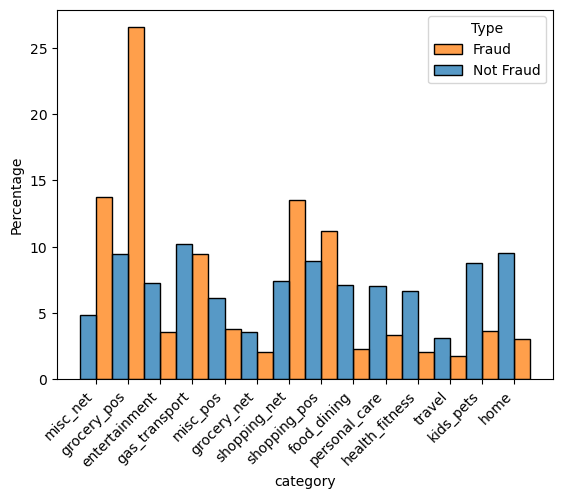

In [15]:
ax=sns.histplot(x='category',data=train[train.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=5)
ax.set_ylabel('Percentage')
ax.set_xlabel('category')
# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [17]:
train["categoryname"] = train["category"]
train["category"] = encoder.fit_transform(train["category"])
train

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\4097340439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["categoryname"] = train["category"]
C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\4097340439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["category"] = encoder.fit_transform(train["category"])


category     amt gender  city_pop                                job  \
0               8    4.97      F      3495          Psychologist, counselling   
1               4  107.23      F       149  Special educational needs teacher   
2               0  220.11      M      4154        Nature conservation officer   
3               2   45.00      M      1939                    Patent attorney   
4               9   41.96      M        99     Dance movement psychotherapist   
...           ...     ...    ...       ...                                ...   
1296670         0   15.56      M       258                       Geoscientist   
1296671         1   51.70      M       100   Production assistant, television   
1296672         1  105.93      M       899                    Naval architect   
1296673         1   74.90      M      1126              Volunteer coordinator   
1296674         1    4.30      M       218           Therapist, horticultural   

          age  trans_month  trans_year  latitudinal_distance  \
0        30.0            1        2019                 0.068   
1        40.0            1        2019                 0.271   
2        56.0            1        2019                 0.970   
3        51.0            1        2019                 0.804   
4        32.0            1        2019                 0.254   
...       ...          ...         ...                   ...   
1296670  58.0            6        2020                 0.876   
1296671  40.0            6        2020                 0.360   
1296672  52.0            6        2020                 0.680   
1296673  39.0            6        2020                 0.564   
1296674  24.0            6        2020                 0.723   

         longitudinal_distance    distance  is_fraud   categoryname  
0                        0.870   78.597568         0       misc_net  
1                        0.024   30.212176         0    grocery_pos  
2                        0.108  108.206083         0  entertainment  
3                        0.447   95.673231         0  gas_transport  
4                        0.830   77.556744         0       misc_pos  
...                        ...         ...       ...            ...  
1296670                  0.787  119.752136         0  entertainment  
1296671                  0.736   75.104085         0    food_dining  
1296672                  0.688   99.047734         0    food_dining  
1296673                  0.700   84.627652         0    food_dining  
1296674                  0.311   83.853655         0    food_dining  

[1296675 rows x 13 columns]

In [18]:
test["categoryname"] = test["category"]
test["category"] = encoder.fit_transform(test["category"])
test

category     amt gender  city_pop                     job  is_fraud  \
0             10    2.86      M    333497     Mechanical engineer         0   
1             10   29.84      F       302  Sales professional, IT         0   
2              5   41.28      F     34496       Librarian, public         0   
3              9   60.05      M     54767            Set designer         0   
4             13    3.19      M      1126      Furniture designer         0   
...          ...     ...    ...       ...                     ...       ...   
555714         5   43.77      M       519            Town planner         0   
555715         7  111.84      M     28739          Futures trader         0   
555716         7   86.88      F      3684                Musician         0   
555717        13    7.99      M       129            Cartographer         0   
555718         0   38.13      M    116001             Media buyer         0   

         age  trans_month  trans_year  latitudinal_distance  \
0       52.0            6        2020                 0.020   
1       30.0            6        2020                 0.870   
2       49.0            6        2020                 0.177   
3       32.0            6        2020                 0.243   
4       64.0            6        2020                 0.706   
...      ...          ...         ...                   ...   
555714  54.0           12        2020                 0.546   
555715  21.0           12        2020                 0.622   
555716  39.0           12        2020                 0.462   
555717  55.0           12        2020                 0.155   
555718  27.0           12        2020                 0.544   

        longitudinal_distance    distance    categoryname  
0                       0.265   24.561462   personal_care  
1                       0.476  104.925092   personal_care  
2                       0.660   59.080078  health_fitness  
3                       0.064   27.698567        misc_pos  
4                       0.868  104.335106          travel  
...                       ...         ...             ...  
555714                  0.558   77.026148  health_fitness  
555715                  0.747  100.074420       kids_pets  
555716                  0.813   80.759302       kids_pets  
555717                  0.632   52.933240          travel  
555718                  0.443   72.438289   entertainment  

[555719 rows x 13 columns]

In [19]:
# non_fraud
non_fraud = train[train['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = train[train['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_level'].round(3)

non_fraud_vs_fraud['category_name'] = encoder.inverse_transform(non_fraud_vs_fraud['category'])

non_fraud_vs_fraud

category  not_fraud_percentual_vs_total  fraud_percentage_vs_total  \
0          2                       0.101648                   0.082334   
1          6                       0.095346                   0.026379   
2          4                       0.094553                   0.232214   
3         12                       0.089848                   0.112310   
4          7                       0.087495                   0.031841   
5         11                       0.074335                   0.228217   
6          0                       0.072745                   0.031042   
7          1                       0.070829                   0.020117   
8         10                       0.070230                   0.029310   
9          5                       0.066513                   0.017719   
10         9                       0.061594                   0.033307   
11         8                       0.048382                   0.121902   
12         3                       0.035153                   0.017852   
13        13                       0.031331                   0.015454   

    fraud_level   category_name  
0        -0.019   gas_transport  
1        -0.069            home  
2         0.138     grocery_pos  
3         0.022    shopping_pos  
4        -0.056       kids_pets  
5         0.154    shopping_net  
6        -0.042   entertainment  
7        -0.051     food_dining  
8        -0.041   personal_care  
9        -0.049  health_fitness  
10       -0.028        misc_pos  
11        0.074        misc_net  
12       -0.017     grocery_net  
13       -0.016          travel

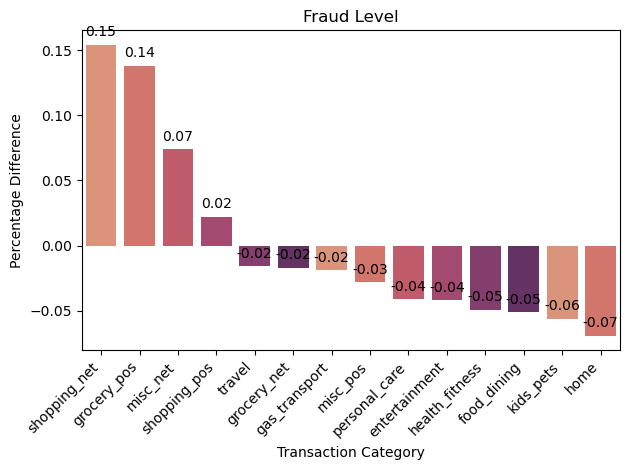

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming non_fraud_vs_fraud is your DataFrame and custom_palette is defined

# Set the custom color palette
custom_palette = sns.color_palette("flare")

# Create the bar plot
ax = sns.barplot(y='fraud_level', x='category_name',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)

# Set labels and title
ax.set_ylabel('Percentage Difference')
ax.set_xlabel('Transaction Category')
plt.title('Fraud Level')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()
train.drop(columns=['categoryname'],inplace=True)
test.drop(columns=['categoryname'],inplace=True)

In [21]:

#train["category"] = encoder.fit_transform(train["category"])
train["gender"] = encoder.fit_transform(train["gender"])
test["gender"] = encoder.fit_transform(test["gender"])
train["job"] = encoder.fit_transform(train["job"])
    
# test["category"] = encoder.fit_transform(test["category"])

test["job"] = encoder.fit_transform(test["job"])
train

category     amt  gender  city_pop  job   age  trans_month  \
0               8    4.97       0      3495  370  30.0            1   
1               4  107.23       0       149  428  40.0            1   
2               0  220.11       1      4154  307  56.0            1   
3               2   45.00       1      1939  328  51.0            1   
4               9   41.96       1        99  116  32.0            1   
...           ...     ...     ...       ...  ...   ...          ...   
1296670         0   15.56       1       258  215  58.0            6   
1296671         1   51.70       1       100  360  40.0            6   
1296672         1  105.93       1       899  308  52.0            6   
1296673         1   74.90       1      1126  485  39.0            6   
1296674         1    4.30       1       218  467  24.0            6   

         trans_year  latitudinal_distance  longitudinal_distance    distance  \
0              2019                 0.068                  0.870   78.597568   
1              2019                 0.271                  0.024   30.212176   
2              2019                 0.970                  0.108  108.206083   
3              2019                 0.804                  0.447   95.673231   
4              2019                 0.254                  0.830   77.556744   
...             ...                   ...                    ...         ...   
1296670        2020                 0.876                  0.787  119.752136   
1296671        2020                 0.360                  0.736   75.104085   
1296672        2020                 0.680                  0.688   99.047734   
1296673        2020                 0.564                  0.700   84.627652   
1296674        2020                 0.723                  0.311   83.853655   

         is_fraud  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1296670         0  
1296671         0  
1296672         0  
1296673         0  
1296674         0  

[1296675 rows x 12 columns]

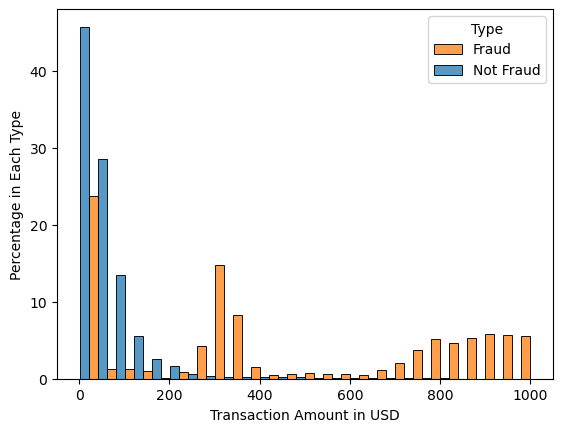

In [22]:
#amount vs fraud
ax=sns.histplot(x='amt',data=train[train.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

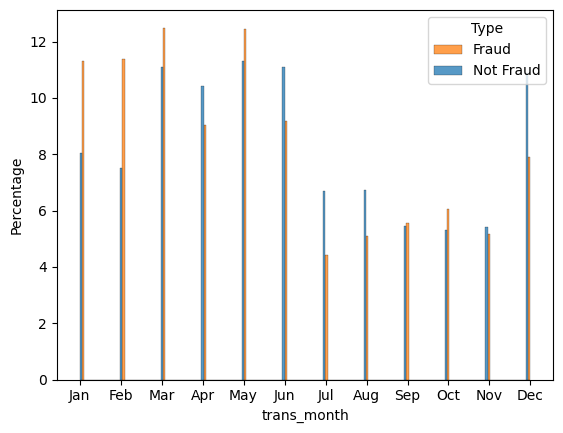

In [23]:
#month vs fraud
ax=sns.histplot(data=train, x="trans_month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('trans_month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [24]:
# non_fraud
non_fraud = train[train['is_fraud'] == 0]['category'].value_counts(
    normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = train[train['is_fraud'] == 1]['category'].value_counts(
    normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_level'].round(3)

non_fraud_vs_fraud['category_name'] = encoder.inverse_transform(non_fraud_vs_fraud['category'])

non_fraud_vs_fraud

category  not_fraud_percentual_vs_total  fraud_percentage_vs_total  \
0          2                       0.101648                   0.082334   
1          6                       0.095346                   0.026379   
2          4                       0.094553                   0.232214   
3         12                       0.089848                   0.112310   
4          7                       0.087495                   0.031841   
5         11                       0.074335                   0.228217   
6          0                       0.072745                   0.031042   
7          1                       0.070829                   0.020117   
8         10                       0.070230                   0.029310   
9          5                       0.066513                   0.017719   
10         9                       0.061594                   0.033307   
11         8                       0.048382                   0.121902   
12         3                       0.035153                   0.017852   
13        13                       0.031331                   0.015454   

    fraud_level                                     category_name  
0        -0.019              Accountant, chartered public finance  
1        -0.069                               Administrator, arts  
2         0.138                                     Acupuncturist  
3         0.022                            Advertising copywriter  
4        -0.056  Administrator, charities/voluntary organisations  
5         0.154                       Advertising account planner  
6        -0.042                                Academic librarian  
7        -0.051                   Accountant, chartered certified  
8        -0.041                     Advertising account executive  
9        -0.049                                     Administrator  
10       -0.028                   Administrator, local government  
11        0.074                          Administrator, education  
12       -0.017                             Accounting technician  
13       -0.016                                     Advice worker

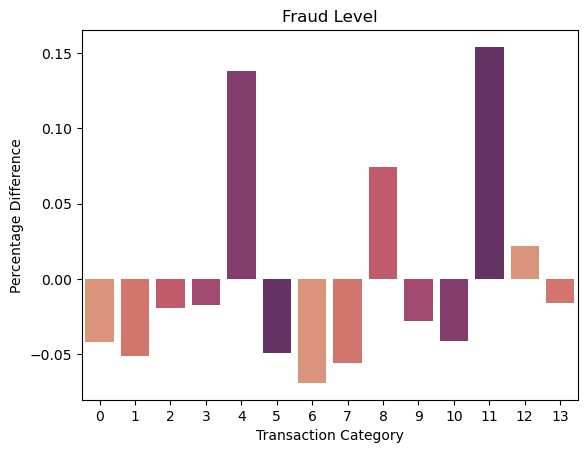

In [25]:
custom_palette = sns.color_palette("flare")
ax = sns.barplot(y='fraud_level', x='category',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_ylabel('Percentage Difference')
ax.set_xlabel('Transaction Category')
plt.title('Fraud Level');

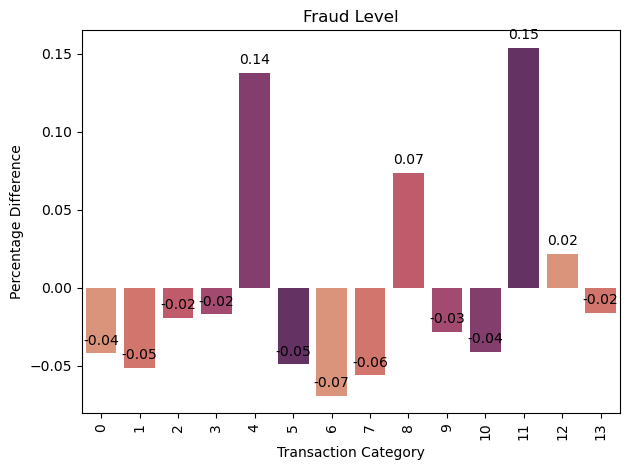

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming non_fraud_vs_fraud is your DataFrame and custom_palette is defined

# Set the custom color palette
custom_palette = sns.color_palette("flare")

# Create the bar plot
ax = sns.barplot(y='fraud_level', x='category',
                 data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)

# Set labels and title
ax.set_ylabel('Percentage Difference')
ax.set_xlabel('Transaction Category')
plt.title('Fraud Level')

# Add labels inside the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9),
                textcoords='offset points')

# Show the plot
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.tight_layout()       # Adjust layout to make room for labels
plt.show()



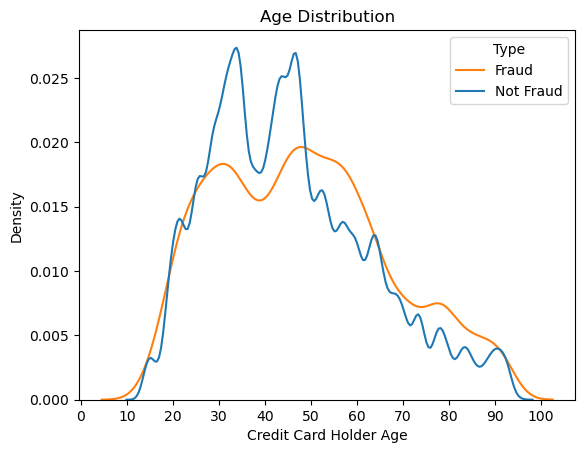

In [27]:
ax = sns.kdeplot(x='age', data=train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

In [28]:
#temp
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(train.iloc[:,0:11],train.iloc[:,11]);

In [29]:
#temp
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, train.iloc[:,0:11].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [30]:
#temp
# Create a list of tuples (name, importance)
features_importance = [(name, importance) for name, importance in zip(train.iloc[:, 0:11].columns, rnd_clf.feature_importances_)]

# Sort the list of tuples in descending order based on importance
features_importance.sort(key=lambda x: x[1], reverse=True)

# Print the sorted features
for name, importance in features_importance:
    print(f'"{name}": {importance},')


"amt": 0.5653704983278317,
"category": 0.16480879262836592,
"city_pop": 0.04812060279635417,
"age": 0.04414526758333407,
"distance": 0.036717809133245155,
"job": 0.03646759933126879,
"longitudinal_distance": 0.03561795703957012,
"latitudinal_distance": 0.03346610185853939,
"trans_month": 0.021393680745753957,
"gender": 0.009329409369298108,
"trans_year": 0.004562281186438677,


In [31]:
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

<AxesSubplot:>

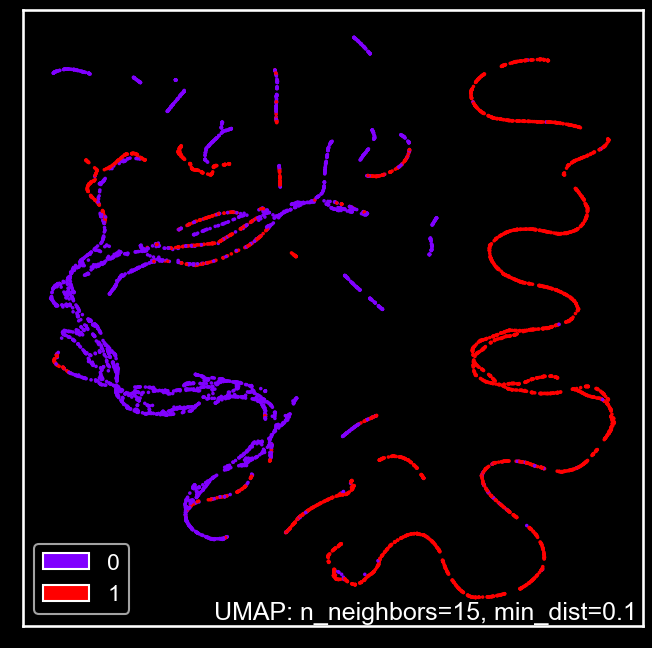

In [32]:
# total = pd.concat([test,train])
fraud_rows = train[train['is_fraud'] == 1]
real_rows = train[train['is_fraud'] == 0]
# Selecting the first 1000 rows from the filtered data
first_1000_fraud_rows = fraud_rows.iloc[:7506 ]
first_1000_real_rows = real_rows.iloc[:7506 ]
first_2000_real_fraud_rows = pd.concat([first_1000_fraud_rows,first_1000_real_rows])
# Shuffle the rows
first_2000_real_fraud_rows = first_2000_real_fraud_rows.sample(frac=1, random_state=42).reset_index(drop=True)


first_2000_real_fraud_rows
import seaborn as sns
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

import umap
import umap.plot
#card_df_smote = pd.concat([X_train,y_train],axis=1)
mapper = umap.UMAP().fit(first_2000_real_fraud_rows.loc[:7506  , :'amt']) 
umap.plot.points(mapper, labels=first_2000_real_fraud_rows.loc[:7506  , 'is_fraud'], theme='fire')


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



<AxesSubplot:>

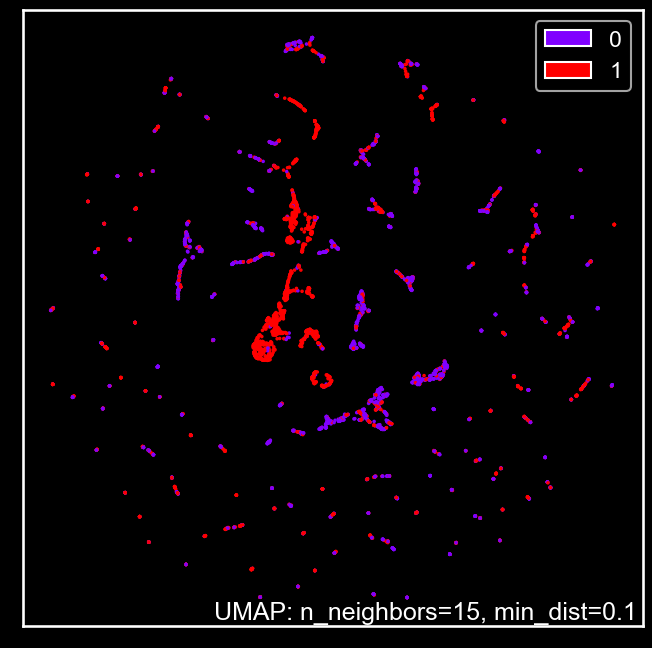

In [33]:
mapper = umap.UMAP().fit(first_2000_real_fraud_rows.loc[:7506  , :'distance']) 
umap.plot.points(mapper, labels=first_2000_real_fraud_rows.loc[:7506  , 'is_fraud'], theme='fire')
# first_2000_real_fraud_rows.loc[:7506  , :'distance']
# first_2000_real_fraud_rows.loc[:7506  , 'is_fraud']

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



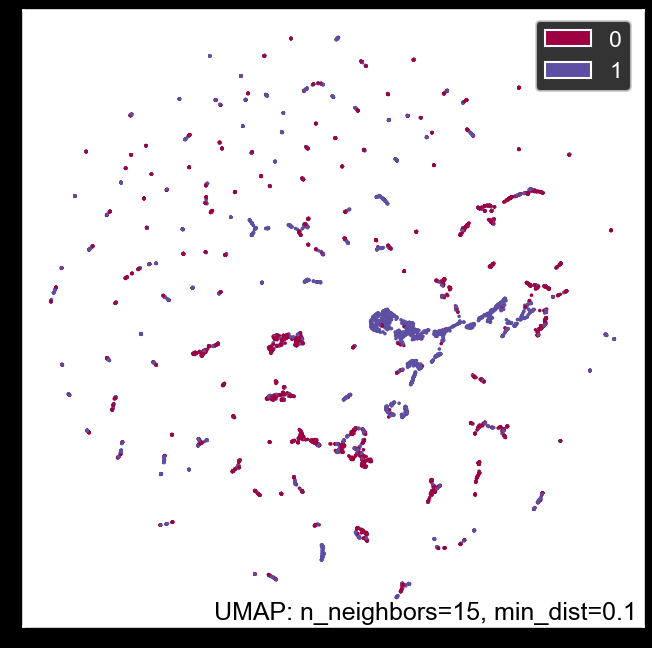

In [34]:
 
data = first_2000_real_fraud_rows.loc[:7506  , :'distance']
labels = first_2000_real_fraud_rows.loc[:7506  , 'is_fraud']

# Fit UMAP to the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Plot the UMAP embedding
umap.plot.points(reducer, labels=labels)
plt.show()

In [35]:
plt.style.use('default')

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy={1:48050}, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 1289169, 1: 7506})
After SMOTE: Counter({0: 1289169, 1: 48050})


In [37]:
class test_model:
    def __init__(self):
        self.metrics = ['prfs','auc','acc','cm']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        #print('Classification report:\n', classification_report(y_test, y_pred))
        return y_pred
    
    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            elif metric =='cm':
                results['cm'] = confusion_matrix(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

In [38]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [39]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

In [40]:
# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

In [41]:
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=3)

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



[[548829   4745]
 [  1589    556]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.10      0.26      0.15      2145

    accuracy                           0.99    555719
   macro avg       0.55      0.63      0.57    555719
weighted avg       0.99      0.99      0.99    555719



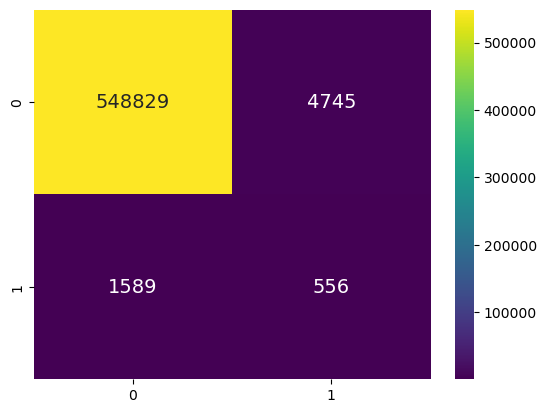

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
cfs_matrix=confusion_matrix(y_test,knn_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

print('\n')
print(classification_report(y_test,knn_pred))

[[546436   7138]
 [  1117   1028]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.13      0.48      0.20      2145

    accuracy                           0.99    555719
   macro avg       0.56      0.73      0.60    555719
weighted avg       0.99      0.99      0.99    555719



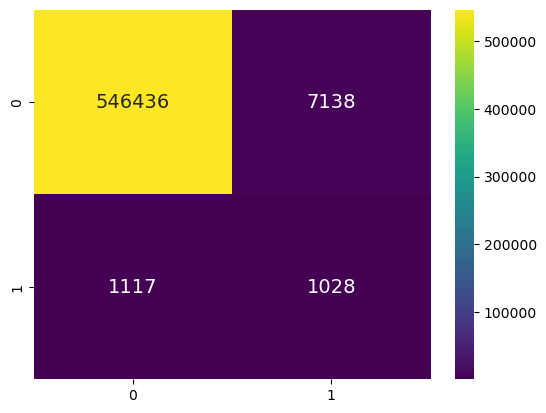

In [43]:
gnb = GaussianNB()
gnb.fit(X_train_smote,y_train_smote)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))

cfs_matrix=confusion_matrix(y_test,gnb_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

print('\n')
print(classification_report(y_test,gnb_pred))

[[551315   2259]
 [   779   1366]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.38      0.64      0.47      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.82      0.74    555719
weighted avg       1.00      0.99      1.00    555719



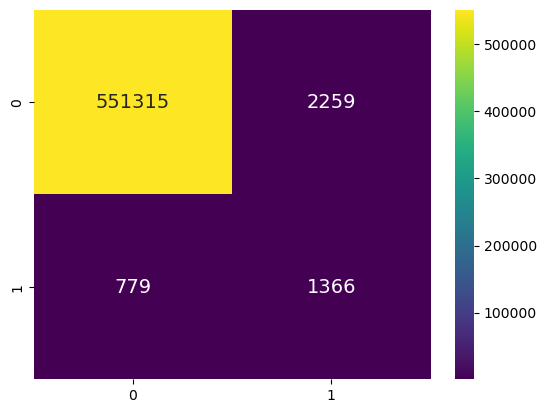

In [44]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_smote,y_train_smote)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
cfs_matrix=confusion_matrix(y_test,dtree_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
print('\n')
print(classification_report(y_test,dtree_pred))

[[552762    812]
 [   624   1521]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.71      0.68      2145

    accuracy                           1.00    555719
   macro avg       0.83      0.85      0.84    555719
weighted avg       1.00      1.00      1.00    555719



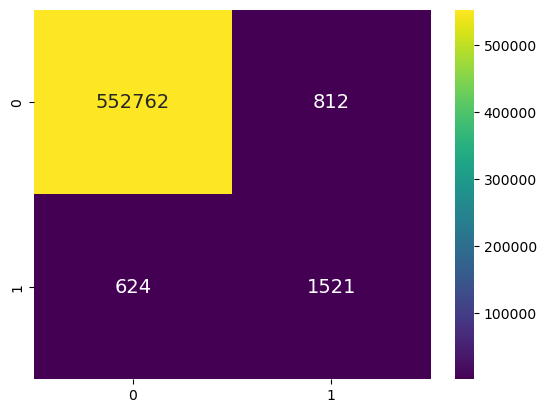

In [45]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_smote,y_train_smote)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
cfs_matrix=confusion_matrix(y_test,rfc_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
print('\n')
print(classification_report(y_test,rfc_pred))

[[552468   1106]
 [  1030   1115]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.50      0.52      0.51      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.76      0.75    555719
weighted avg       1.00      1.00      1.00    555719



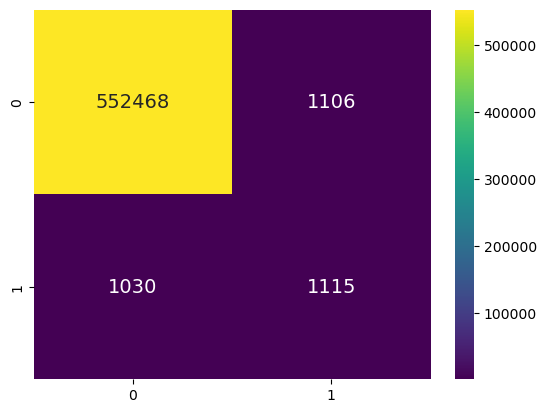

In [46]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train_smote,y_train_smote)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
cfs_matrix=confusion_matrix(y_test,adabc_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
print('\n')
print(classification_report(y_test,adabc_pred))

[[551221   2353]
 [   652   1493]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.39      0.70      0.50      2145

    accuracy                           0.99    555719
   macro avg       0.69      0.85      0.75    555719
weighted avg       1.00      0.99      1.00    555719



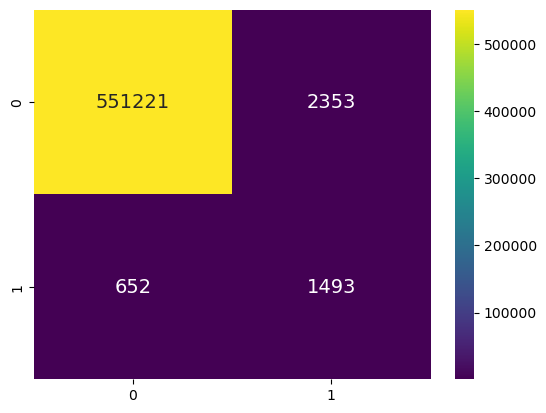

In [47]:
# bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50)
bgc.fit(X_train_smote,y_train_smote)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
cfs_matrix=confusion_matrix(y_test,bgc_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
print('\n')
print(classification_report(y_test,bgc_pred))

[[551497   2077]
 [  1269    876]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.30      0.41      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.70      0.67    555719
weighted avg       0.99      0.99      0.99    555719



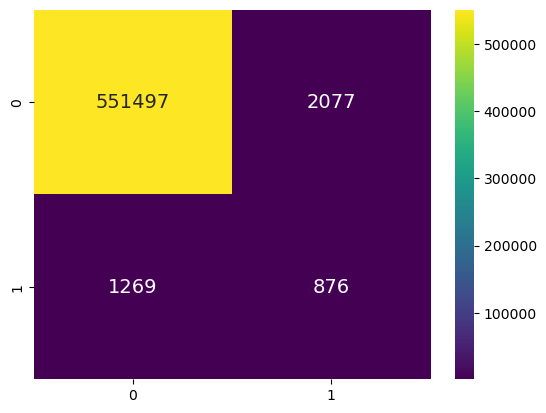

In [48]:
LRM = LogisticRegression()
LRM.fit(X_train_smote,y_train_smote)
LRM_pred = LRM.predict(X_test)

print(confusion_matrix(y_test,LRM_pred))
cfs_matrix=confusion_matrix(y_test,LRM_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
print('\n')
print(classification_report(y_test,LRM_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               #KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               KNeighborsClassifier(n_neighbors= 3),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42),
               LogisticRegression(random_state=42)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_smote,y_train_smote)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\1022759752.py:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\1022759752.py:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\1022759752.py:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sanja\AppData\Local\Temp\ipykernel_105264\1022759752.py:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()